Step 1: Load the dataset: 

we first load the dataset and check its structure to understand what kind of data we are dealing with.

In [1]:
import pandas as pd

file_path = "../Dataset/Averages in in General Aptitude Tests aa.csv"
df = pd.read_csv(file_path)

#Display basic info about the dataset
df.info()  # Shows column names, data types, and missing values
df.head()  # Displays the first 5 rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6720 entries, 0 to 6719
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   اسم_المدرسة                      6720 non-null   object 
 1   المنطقة_الإدارية                 6720 non-null   object 
 2   الإدارة_التعليمية                6707 non-null   object 
 3   المكتب_التعليمي                  6706 non-null   object 
 4   السلطة                           6720 non-null   object 
 5   نوع_التعليم                      6720 non-null   object 
 6   الجنس                            6720 non-null   object 
 7   نوع_الاختبار                     6720 non-null   object 
 8   تخصص_الاختبار                    6720 non-null   object 
 9   متوسط_أداء_الطلبة_في_المدرسة     6720 non-null   float64
 10  ترتيب_المدرسة_على_مستوى_المدارس  6720 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 577.6+ KB


,اسم_المدرسة,المنطقة_الإدارية,الإدارة_التعليمية,المكتب_التعليمي,السلطة,نوع_التعليم,الجنس,نوع_الاختبار,تخصص_الاختبار,متوسط_أداء_الطلبة_في_المدرسة,ترتيب_المدرسة_على_مستوى_المدارس
0,أم سلمة الثانوية للموهوبات - مقررات,مكة المكرمة,الإدارة العامة للتعليم بمنطقة مكة المكرمة,مكتب التعليم جنوب مكة المكرمة,حكومي,تعليم عام بنات,بنات,قدرات,علمي,89.622377,1
1,ثانوية الرواد الأهلية ( الازدهار ) - مقررات,الرياض,الإدارة العامة للتعليم بمنطقة الرياض,شمال,أهلي,تعليم عام بنات,بنات,قدرات,نظري,84.440000,1
2,ثانوية الموهوبات ( نظام مقررات ),مكة المكرمة,الإدارة العامة للتعليم بمحافظة جدة,مكتب التعليم بشمال جدة,حكومي,تعليم عام بنات,بنات,قدرات,علمي,89.280423,2
3,الثانوية السادسة لتحفيظ القرآن الكريم 6 - مقررات,الرياض,الإدارة العامة للتعليم بمنطقة الرياض,شمال,حكومي,تحفيظ بنات,بنات,قدرات,نظري,83.550000,2
4,ثانوية مدارس الظهران الاهلية (مقررات),الشرقية,الإدارة العامة للتعليم بالمنطقة الشرقية,مكتب التعليم بمحافظة الخبر,أهلي,تعليم عام بنات,بنات,قدرات,علمي,88.903225,3


Step 2: Check for Missing Values & Handle Them:

In [2]:
# Count missing values for each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 اسم_المدرسة                         0
المنطقة_الإدارية                    0
الإدارة_التعليمية                  13
المكتب_التعليمي                    14
السلطة                              0
نوع_التعليم                         0
الجنس                               0
نوع_الاختبار                        0
تخصص_الاختبار                       0
متوسط_أداء_الطلبة_في_المدرسة        0
ترتيب_المدرسة_على_مستوى_المدارس     0
dtype: int64


In [3]:
# Replace missing values with "Unknown" for categorical columns and 0 for numerical columns
df.fillna("Unknown", inplace=True)


Explanation

Step 1 (Checking Missing Values): We print the number of missing values per column to decide how to handle them.

Step 2 (Handling Missing Values):

If a column is categorical (text-based), missing values are replaced with "Unknown", so the machine learning model does not receive empty inputs.

If a column is numerical, missing values are replaced with 0, so calculations like mean, variance, and scaling are not affected.

Step 3: Remove Duplicate Rows:

Duplicate rows can bias the machine learning model, especially in classification tasks, because they make certain patterns appear more frequently than they should.

In [5]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


Explanation

Step 1 (Checking Duplicates): We count how many duplicate rows exist in the dataset.

Step 2 (Removing Duplicates): We remove them using df.drop_duplicates(inplace=True), ensuring that every row in the dataset is unique.

Step 4: Convert Categorical (Text) Columns into Numeric Values:

Machine learning models can only process numerical values. Any text-based columns need to be converted into numbers.

In [8]:
# Print the categorical column names
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:\n", categorical_columns)


Categorical columns:
 Index(['اسم_المدرسة', 'المنطقة_الإدارية', 'الإدارة_التعليمية',
       'المكتب_التعليمي', 'السلطة', 'نوع_التعليم', 'الجنس', 'نوع_الاختبار',
       'تخصص_الاختبار'],
      dtype='object')


In [9]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to all categorical columns
label_encoders = {}  # Dictionary to store encoders for later use
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert text to numbers
    label_encoders[col] = le  # Save the encoder in case we need to decode later


Explanation

Step 1 (Identify Categorical Columns): We identify all columns that contain text values.

Step 2 (Convert Text to Numbers using Label Encoding):

Each unique text value is assigned a number (e.g., "Male" → 0, "Female" → 1).

This ensures that machine learning models can process categorical data.


Step 5: Normalize Numerical Data

Some numerical features might have different scales (e.g., one feature might have values between 0-100, while another might have values between 0-1). Normalization ensures that all numerical features have similar scales, which improves model performance.

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Apply Min-Max Scaling to normalize the data
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


 Explanation
 
Min-Max Scaling transforms all numerical values to be in the range 0 to 1.

This prevents large numbers from dominating smaller numbers when training the model.

Step 6: Apply Data Transformation (If Needed)

Transformation is needed when:

The data is not normally distributed (skewed)

The data has extreme outliers

The model requires log or power transformations

Since we haven’t checked the distribution yet, let’s first check if we need transformation.

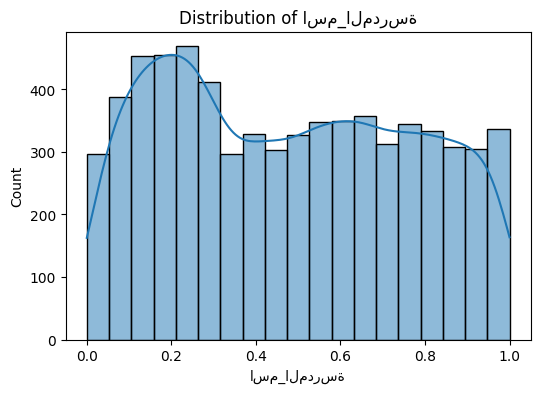

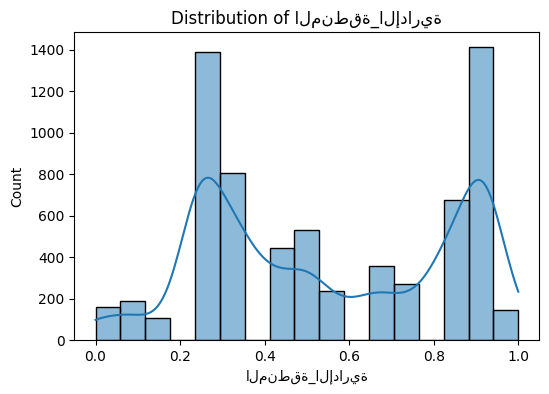

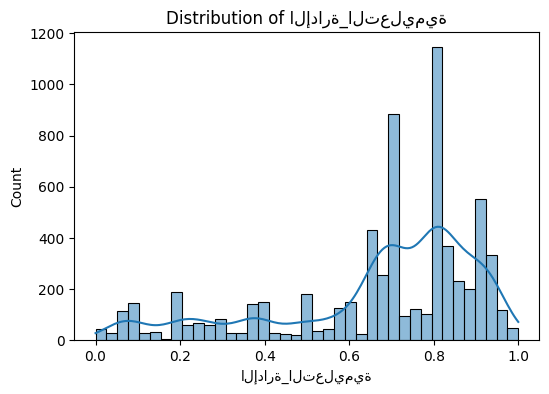

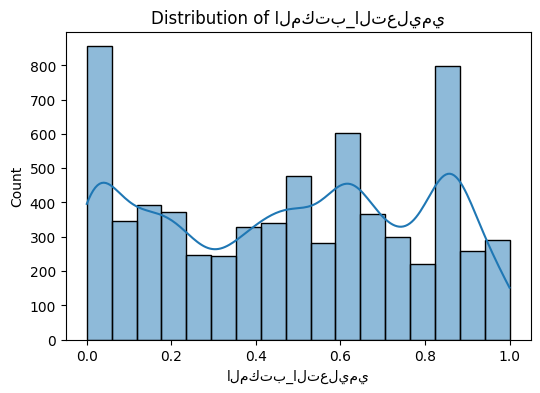

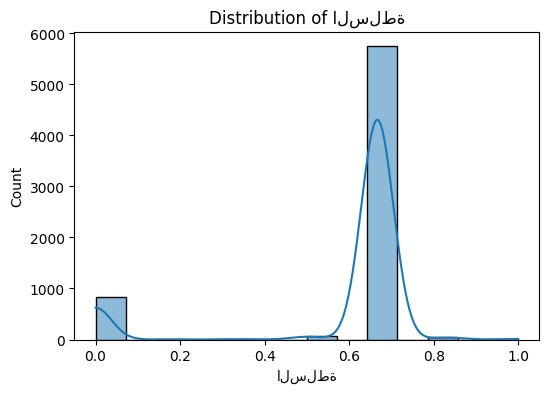

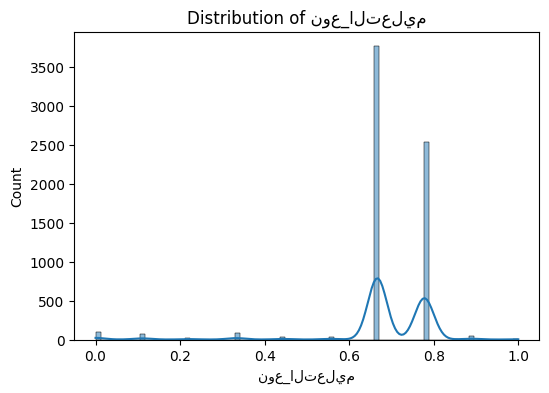

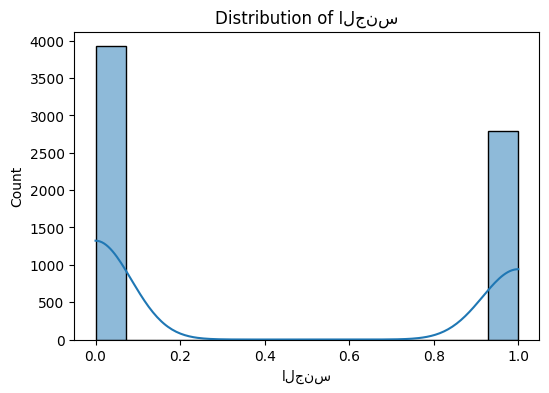

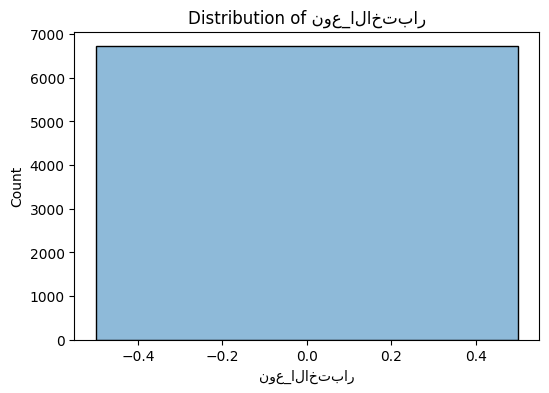

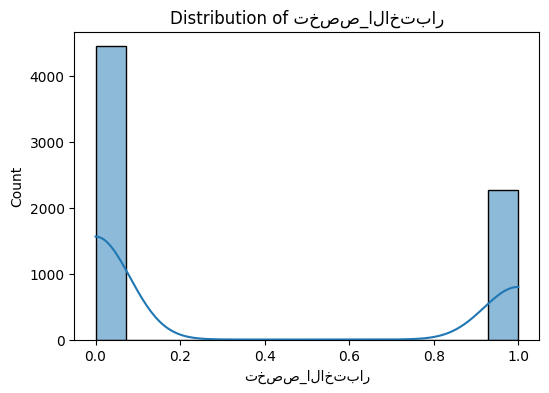

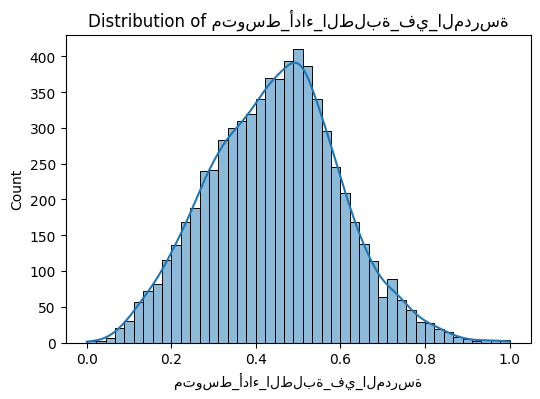

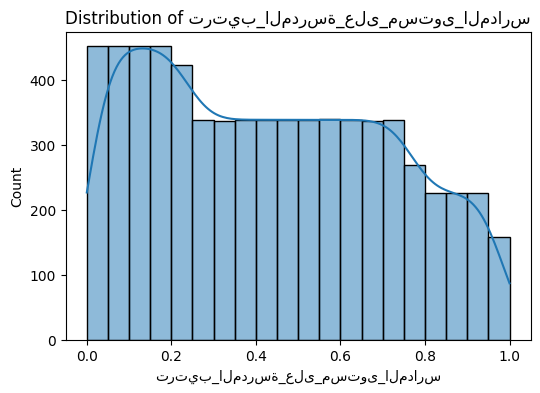

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of numerical columns
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


For our dataset, we checked:


متوسط_أداء_الطلبة_في_المدرسة (Mean Student Performance):


Skewness = 0.084 → This indicates the data is nearly symmetric.

From the histogram, the distribution looks balanced, so no transformation is needed.

ترتيب_المدرسة_على_مستوى_المدارس (School Ranking):


Skewness = 0.214 → This shows a slightly right-skewed distribution.

However, the skewness is small and doesn’t require transformation.

Conclusion

Both features are already close to symmetric with low skewness, so we don’t need to apply transformations. The distributions are suitable for use in machine learning models as they are.

Step 7: Save the Cleaned Dataset

In [14]:
# Save the cleaned dataset for future use in model training
cleaned_file_path = "../Dataset/Cleaned_Averages.csv"
df.to_csv(cleaned_file_path, index=False)

print("Cleaned dataset has been saved successfully")


Cleaned dataset has been saved successfully
